## **DIGITAL SIGNAL AND IMAGE MANAGEMENT** - Davide Croatto, Hubert Nowak, Eleonora Zullo


## **Task 2** - Bi-dimensional signal processing

## Import libraries and data


Import all the libraries used in the code.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
import zipfile
from time import time
from shutil import copyfile

from matplotlib import pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential

Google Drive connection and data import.

In [ ]:
# Link Google Drive account, transfer dataset, and extract files
drive.mount('/content/drive')
copyfile('/content/drive/MyDrive/Digital Signals/archive.zip', 'archive.zip')
zip = zipfile.ZipFile('archive.zip')
zip.extractall()
zip.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note:

- 0: Covid (train = 111, test = 26)
- 1: Normal (train = 70, test = 20)
- 2: Viral Pneumonia (train = 70, test = 20)

## Training from scratch

Train and test dataset import

(available on https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset).

In [ ]:
base_path = 'Covid19-dataset/'

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(base_path+'train',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

def preprocess(image, label):
  image = tf.image.resize_with_pad(image, 500, 500)
  image = tf.image.rgb_to_grayscale(image)
  return image, label

train_dataset = train_dataset.map(preprocess)

Found 251 files belonging to 3 classes.


In [ ]:
test_dataset = keras.utils.image_dataset_from_directory(base_path+'test',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

def preprocess(image, label):
  image = tf.image.resize_with_pad(image, 500, 500)
  image = tf.image.rgb_to_grayscale(image)
  return image, label

test_dataset = test_dataset.map(preprocess)

Found 66 files belonging to 3 classes.


Definition of the model.

In [ ]:
num_classes = 3

In [ ]:
# Architecture definition (v1)
inputs = keras.Input((500,500,1))     # because when we import the train and the test set we transform the images to grayscale

x = inputs
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net = keras.Model(inputs, outputs)

In [ ]:
net.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500, 500, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 500, 500, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 500, 500, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 167, 167, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 167, 167, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 167, 167, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,011 (74.26 KB)

 Trainable params: 19,011 (74.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = net.fit(train_dataset,
                  epochs=20,
                  validation_data=test_dataset);

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.3374 - loss: 36.6995 - val_accuracy: 0.3333 - val_loss: 8.3281
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5595 - loss: 7.0338 - val_accuracy: 0.5758 - val_loss: 5.2534
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5727 - loss: 4.4583 - val_accuracy: 0.5000 - val_loss: 10.4617
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6693 - loss: 5.1403 - val_accuracy: 0.5152 - val_loss: 13.1336
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7420 - loss: 4.5681 - val_accuracy: 0.4545 - val_loss: 5.4250
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6428 - loss: 3.1376 - val_accuracy: 0.4848 - val_loss: 11.0566
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5586 - loss: 5.7861 - val_accuracy: 0.6818 - val_loss: 2.2138
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8940 - loss: 1.0109 - val_accuracy: 0.7121 - val_loss: 1.5822
Epoch 9/2

In [ ]:
test_loss, test_acc = net.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7551 - loss: 1.5317 
Test Accuracy: 75.76%


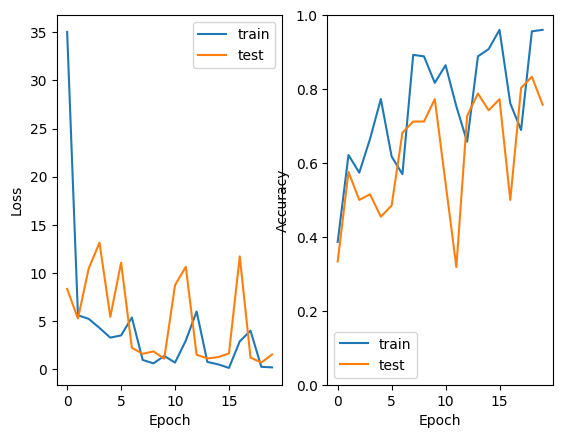

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

### Normalization

We try to improve the results of our model normalizing the image values.

In [ ]:
# firstly, we check the min value and max value of training dataset images.

# Iterate through the dataset to find min and max pixel values
min_val = float('inf')
max_val = float('-inf')

for images, labels in train_dataset:
  min_val = min(min_val, np.min(images.numpy()))
  max_val = max(max_val, np.max(images.numpy()))

print(f"Minimum pixel value in the training dataset: {min_val}")
print(f"Maximum pixel value in the training dataset: {max_val}")

Minimum pixel value in the training dataset: 0.0
Maximum pixel value in the training dataset: 254.97451782226562


In [ ]:
normalization_layer = keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# now they are normalized

# Iterate through the dataset to find min and max pixel values
min_val = float('inf')
max_val = float('-inf')

for images, labels in train_dataset:
  min_val = min(min_val, np.min(images.numpy()))
  max_val = max(max_val, np.max(images.numpy()))

print(f"Minimum pixel value in the training dataset: {min_val}")
print(f"Maximum pixel value in the training dataset: {max_val}")

Minimum pixel value in the training dataset: 0.0
Maximum pixel value in the training dataset: 0.9999001026153564


We use the same architecture as before, but now we are using the normalized dataset.

In [ ]:
# Architecture definition (v1)
inputs = keras.Input((500,500,1))

x = inputs
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(2, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net1 = keras.Model(inputs, outputs)

In [ ]:
net1.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.RMSprop(learning_rate=0.0007),
            metrics=['accuracy'])

In [ ]:
history = net1.fit(train_dataset,
                  epochs=20,
                  validation_data=test_dataset);

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 0.2918 - loss: 1.1296 - val_accuracy: 0.3939 - val_loss: 1.0904
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4545 - loss: 1.0581 - val_accuracy: 0.5152 - val_loss: 1.0586
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5289 - loss: 1.0164 - val_accuracy: 0.5152 - val_loss: 1.0461
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6759 - loss: 1.0133 - val_accuracy: 0.3939 - val_loss: 1.0561
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4903 - loss: 0.9869 - val_accuracy: 0.4545 - val_loss: 1.0255
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5396 - loss: 0.9774 - val_accuracy: 0.5606 - val_loss: 1.0061
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6689 - loss: 0.9418 - val_accuracy: 0.5455 - val_loss: 0.9960
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6980 - loss: 0.9315 - val_accuracy: 0.5455 - val_loss: 0.9847
Epoch 9/20
4/4

In [ ]:
test_loss, test_acc = net1.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6072 - loss: 0.8689
Test Accuracy: 60.61%


### Data augmentation

We virtually create new samples at each training iteration, by applying random transformations.

In [ ]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

augmented_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Concatenate original and augmented datasets
# Note: tf.data.Dataset.concatenate requires datasets with matching structure
full_dataset = train_dataset.concatenate(augmented_dataset)

# Shuffle the combined dataset to ensure randomness
full_dataset = full_dataset.shuffle(buffer_size=1024)  # Adjust buffer_size as needed


We use the same architecture as before using the augmented train dataset.

In [ ]:
# Architecture definition (v1)
inputs = keras.Input((500,500,1))

x = inputs
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(2, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(3, activation='softmax')(x)
net2 = keras.Model(inputs, outputs)

net2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 500, 500, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 500, 500, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 500, 500, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 250, 250, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 250, 250, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 250, 250, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_8               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,011 (74.26 KB)

 Trainable params: 19,011 (74.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks_list = [
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    ]

In [ ]:
net2.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
            metrics=['accuracy'])

In [ ]:
history = net2.fit(full_dataset,
                  epochs=100,
                  validation_data=test_dataset,
                  callbacks=callbacks_list);

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 558ms/step - accuracy: 0.6289 - loss: 2.6731 - val_accuracy: 0.5455 - val_loss: 3.7936 - learning_rate: 1.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 470ms/step - accuracy: 0.7248 - loss: 1.2159 - val_accuracy: 0.5758 - val_loss: 3.6505 - learning_rate: 1.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 474ms/step - accuracy: 0.7626 - loss: 1.0737 - val_accuracy: 0.5000 - val_loss: 4.7013 - learning_rate: 1.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 470ms/step - accuracy: 0.6718 - loss: 1.5305 - val_accuracy: 0.5455 - val_loss: 4.0756 - learning_rate: 1.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 407ms/step - accuracy: 0.6489 - loss: 1.9357 - val_accuracy: 0.4394 - val_loss: 3.9586 - learning_rate: 1.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 471ms/step - accuracy: 0.7646 - loss: 0.9248 - val_accuracy: 0.5909 - val_loss: 3.5349 - learning_rate: 5.0000e-05
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 401ms/step - accuracy: 

In [ ]:
test_loss, test_acc = net2.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6020 - loss: 2.9922 
Test Accuracy: 60.61%


### Weight the categories

To solve the problem of class imbalance, we decide to weight the different categories.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
all_labels = []

for images, labels in train_dataset:
    all_labels.extend(np.argmax(labels.numpy(), axis=1))

y_train = np.array(all_labels)

class_weights = compute_class_weight('balanced', classes =np.array([0,1,2]), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class weights:", class_weight_dict)

Class weights: {0: 0.7537537537537538, 1: 1.1952380952380952, 2: 1.1952380952380952}


We decide to not use the augmented dataset because it didn't improve the results previously.

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(base_path+'train',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

def preprocess(image, label):
  image = tf.image.resize_with_pad(image, 500, 500)
  image = tf.image.rgb_to_grayscale(image)
  return image, label

train_dataset = train_dataset.map(preprocess)

Found 251 files belonging to 3 classes.


In [ ]:
test_dataset = keras.utils.image_dataset_from_directory(base_path+'test',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

def preprocess(image, label):
  image = tf.image.resize_with_pad(image, 500, 500)
  image = tf.image.rgb_to_grayscale(image)
  return image, label

test_dataset = test_dataset.map(preprocess)

Found 66 files belonging to 3 classes.


We use the same architecture as before using the weighted classes.

In [ ]:
# Architecture definition (v1)
inputs = keras.Input((500,500,1))

x = inputs
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(2, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net3 = keras.Model(inputs, outputs)

In [ ]:
net3.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.RMSprop(learning_rate=0.0007),
            metrics=['accuracy'])

In [ ]:
history = net3.fit(train_dataset,
                  epochs=20,
                  validation_data=test_dataset,
                  class_weight=class_weight_dict);

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3460 - loss: 50.0349 - val_accuracy: 0.3333 - val_loss: 15.2625
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3010 - loss: 14.5150 - val_accuracy: 0.4242 - val_loss: 5.2936
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4865 - loss: 5.7118 - val_accuracy: 0.4091 - val_loss: 8.8540
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4692 - loss: 9.2920 - val_accuracy: 0.5000 - val_loss: 5.1836
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5707 - loss: 4.4789 - val_accuracy: 0.3485 - val_loss: 11.6535
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5226 - loss: 6.4866 - val_accuracy: 0.3939 - val_loss: 6.7977
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5284 - loss: 4.7396 - val_accuracy: 0.5303 - val_loss: 5.0645
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6695 - loss: 3.1285 - val_accuracy: 0.6667 - val_loss: 3.0499
Epoch 9/2

In [ ]:
test_loss, test_acc = net3.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7857 - loss: 1.0928 
Test Accuracy: 78.79%


In [ ]:
yc_pred = net3.predict(test_dataset)
y_pred = np.argmax(yc_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


In [ ]:
yc_test = np.concatenate([y for _, y in test_dataset], axis=0)
y_test = np.argmax(yc_test, axis=1)

Confusion matrix:


Text(0, 0.5, 'Ground truth class')

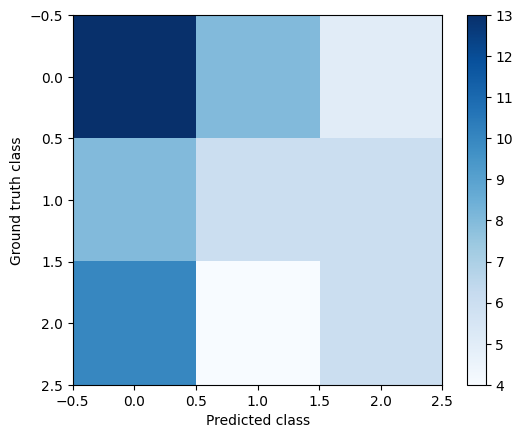

In [ ]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('Ground truth class')

## Transfer learning

We decide to use also a pre-trained model to see if there are improvements in results.

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

base_model = EfficientNetB3(input_shape=(500, 500, 3), include_top=False, weights='imagenet')

base_model.trainable = False

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


We use the initial train and test dataset, not augmented, not normalized.

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(base_path+'train',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

Found 251 files belonging to 3 classes.


In [ ]:
test_dataset = keras.utils.image_dataset_from_directory(base_path+'test',
                                                            image_size=(500,500),
                                                            batch_size=64,
                                                            label_mode='categorical',
                                                            shuffle=True,
                                                            seed=1)

Found 66 files belonging to 3 classes.


We define the model.

In [ ]:
inputs = keras.Input(shape=(500, 500, 3))

x = inputs
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(3, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_dataset,
                    epochs=40,
                    validation_data=test_dataset,
                    callbacks=[lr_reducer, early_stopping]);

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 126s 22s/step - accuracy: 0.3398 - loss: 1.8320 - val_accuracy: 0.3030 - val_loss: 1.1108 - learning_rate: 1.0000e-04
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3365 - loss: 1.5945 - val_accuracy: 0.3030 - val_loss: 1.0868 - learning_rate: 1.0000e-04
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4465 - loss: 1.4145 - val_accuracy: 0.3485 - val_loss: 1.0638 - learning_rate: 1.0000e-04
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3784 - loss: 1.3952 - val_accuracy: 0.4242 - val_loss: 1.0412 - learning_rate: 1.0000e-04
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4662 - loss: 1.2248 - val_accuracy: 0.4697 - val_loss: 1.0186 - learning_rate: 1.0000e-04
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4714 - loss: 1.1942 - val_accuracy: 0.5152 - val_loss: 0.9965 - learning_rate: 1.0000e-04
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5149 - loss: 1.0487 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9541 - loss: 0.5302
Test Accuracy: 95.45%


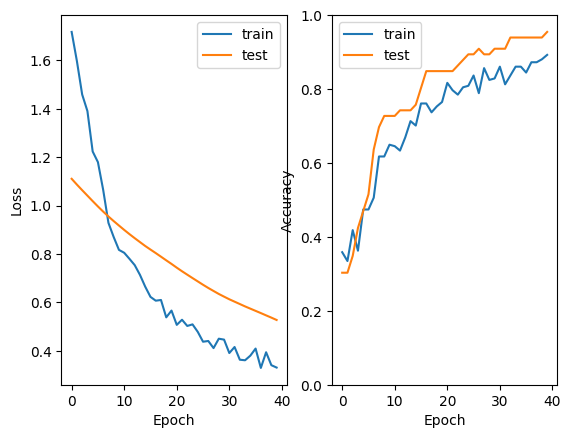

In [ ]:
# Visualization of the learning curves
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim((0,1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [ ]:
model.save('/content/drive/MyDrive/Digital Signals/imageclassification_model.keras')

## TEST

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Digital Signals/imageclassification_model.keras')

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

Image 1:

In [ ]:
image = keras.utils.load_img('/content/Covid19-dataset/test/Covid/0100.jpeg', target_size=(500, 500))
image = keras.utils.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [ ]:
predictions = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [ ]:
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_class = class_labels[np.argmax(predictions)]

In [ ]:
print("Predictions (probabilities for each class):", predictions)
print(f"Result: {predicted_class}")

Predictions (probabilities for each class): [[0.7206827  0.12803033 0.15128703]]
Result: Covid


Image 2:

In [ ]:
image1 = keras.utils.load_img('/content/Covid19-dataset/test/Viral Pneumonia/0104.jpeg', target_size=(500, 500))
image1 = keras.utils.img_to_array(image1)
image1 = np.expand_dims(image1, axis=0)
image1 = preprocess_input(image1)

In [ ]:
predictions1 = model.predict(image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [ ]:
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_class = class_labels[np.argmax(predictions1)]

In [ ]:
print("Predictions (probabilities for each class):", predictions1)
print(f"Result: {predicted_class}")

Predictions (probabilities for each class): [[0.12755458 0.3495355  0.5229099 ]]
Result: Viral Pneumonia
